In [ ]:
# !pip install kaggle
# from google.colab import files
# files.upload()

In [ ]:
# !ls -1ha kaggle.json

In [ ]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# # Permission Warning 이 일어나지 않도록 
# !chmod 600 ~/.kaggle/kaggle.json
# # 본인이 참가한 모든 대회 보기 
# !kaggle competitions list

In [ ]:
!pip3 install tokenizers wandb sentencepiece

     |████████████████████████████████| 6.6 MB 15.5 MB/s 
     |████████████████████████████████| 1.8 MB 59.8 MB/s 
     |████████████████████████████████| 1.2 MB 71.6 MB/s 
     |████████████████████████████████| 144 kB 66.3 MB/s 
     |████████████████████████████████| 181 kB 64.2 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=1b16b2775688f7de45e39359a37147d9efc130c029b4f40ef1f3e747e08fa5da
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools


In [ ]:
!pip install transformers

     |████████████████████████████████| 4.0 MB 14.8 MB/s 
     |████████████████████████████████| 880 kB 68.9 MB/s 
     |████████████████████████████████| 77 kB 6.3 MB/s 
     |████████████████████████████████| 596 kB 81.2 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=a85ef549a5c6aa624168cc0f9d423cc2b8cd6020ce073a872986b9d00e69c2d4
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import os
os.chdir("drive/")
os.chdir('My Drive')
os.chdir('Kaggle')

In [ ]:
# !kaggle competitions download -c us-patent-phrase-to-phrase-matching
# !unzip us-patent-phrase-to-phrase-matching.zip
# !ls

In [ ]:
# debert_v3_tokenizer_path = 'deberta-v2-v3-fast-tokenizer'
# %env TOKENIZERS_PARALLELISM=true

# import shutil
# from pathlib import Path

# transformers_path = Path('/usr/local/lib/python3.7/dist-packages/transformers')
# input_dir = Path('./deberta-v2-v3-fast-tokenizer')

# convert_file = input_dir / "convert_slow_tokenizer.py"
# conversion_path = transformers_path / convert_file.name

# if conversion_path.exists():
#     conversion_path.unlink()

# shutil.copy(convert_file, transformers_path)
# deberta_v2_path = transformers_path / "models" / "deberta_v2"

# for filename in ['tokenization_deberta_v2.py', 'tokenization_deberta_v2_fast.py']:
#     filepath = deberta_v2_path/filename
    
#     if filepath.exists():
#         filepath.unlink()
#     shutil.copy(input_dir/filename, filepath)

In [ ]:
OUTPUT_DIR = './uspppm-deberta-v3-outputs/'
if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Mon May  9 14:51:10 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    26W / 300W |      0MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# ====================================================
# CFG
# ====================================================
class CFG:
    wandb=True
    competition='PPPM'
    _wandb_kernel='bluehills'
    debug=False
    apex=True
    print_freq=100
    num_workers=4
    model="microsoft/deberta-v3-large"
    scheduler='cosine' # ['linear', 'cosine']
    batch_scheduler=True
    num_cycles=0.5
    num_warmup_steps=50
    epochs=5
    encoder_lr=2e-5 #2e-5
    decoder_lr=2e-5 #2e-5
    min_lr=1e-6
    eps=1e-6
    betas=(0.9, 0.999)
    batch_size=10
    fc_dropout=0.2
    target_size=1
    max_len=512
    weight_decay=0.01
    gradient_accumulation_steps=1
    max_grad_norm=1000
    seed=42
    n_fold=10
    trn_fold=[0, 1, 2, 3, 4]
    train=True
    #------------------------------
    # focal loss
    alpha=0.3
    gamma=3
    focal_reduction='mean' # ['mean', 'sum']
    lb_smooth=0.1
    
if CFG.debug:
    CFG.epochs = 2
    CFG.trn_fold = [0]

In [ ]:
# ====================================================
# wandb
# ====================================================
if CFG.wandb:
    import wandb
    try:
        # from kaggle_secrets import UserSecretsClient
        # user_secrets = UserSecretsClient()
        # secret_value_0 = user_secrets.get_secret("wandb_api")
        # wandb.login(key=secret_value_0)
        print('login to wandb')
        wandb.login()
        anony = None
    except:
        anony = "must"
        print('If you want to use your W&B account, go to Add-ons -> Secrets and provide your W&B access token. Use the Label name as wandb_api. \nGet your W&B access token from here: https://wandb.ai/authorize')


    def class2dict(f):
        return dict((name, getattr(f, name)) for name in dir(f) if not name.startswith('__'))

    run = wandb.init(project='PPPM-focal_loss', 
                     name=CFG.model,
                     config=class2dict(CFG),
                     group=CFG.model,
                     job_type="train",
                     anonymous=anony)

login to wandb


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: bluehills. Use `wandb login --relogin` to force relogin


# Library

In [ ]:
# ====================================================
# Library
# ====================================================
import os
import gc
import re
import ast
import sys
import copy
import json
import time
import math
import shutil
import string
import pickle
import random
import joblib
import itertools
from pathlib import Path
import warnings
warnings.filterwarnings("ignore")

import scipy as sp
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
from tqdm.auto import tqdm
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold, GroupKFold, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedGroupKFold

import torch
print(f"torch.__version__: {torch.__version__}")
import torch.nn as nn
from torch.nn import Parameter
import torch.nn.functional as F
from torch.optim import Adam, SGD, AdamW
from torch.utils.data import DataLoader, Dataset
import torch.cuda.amp as amp

import tokenizers
import transformers
print(f"tokenizers.__version__: {tokenizers.__version__}")
print(f"transformers.__version__: {transformers.__version__}")
from transformers import AutoTokenizer, AutoModel, AutoConfig, AutoModelForSequenceClassification
from transformers import get_linear_schedule_with_warmup, get_cosine_schedule_with_warmup
from transformers import AutoTokenizer, AutoConfig, AutoModelForTokenClassification

%env TOKENIZERS_PARALLELISM=true

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

torch.__version__: 1.11.0+cu113
tokenizers.__version__: 0.12.1
transformers.__version__: 4.18.0
env: TOKENIZERS_PARALLELISM=true


# Utils

In [ ]:
# ====================================================
# Utils
# ====================================================
def get_score(y_true, y_pred):
    score = sp.stats.pearsonr(y_true, y_pred)[0]
    return score


def get_logger(filename=OUTPUT_DIR+'train'):
    from logging import getLogger, INFO, StreamHandler, FileHandler, Formatter
    logger = getLogger(__name__)
    logger.setLevel(INFO)
    handler1 = StreamHandler()
    handler1.setFormatter(Formatter("%(message)s"))
    handler2 = FileHandler(filename=f"{filename}.log")
    handler2.setFormatter(Formatter("%(message)s"))
    logger.addHandler(handler1)
    logger.addHandler(handler2)
    return logger

LOGGER = get_logger()

def seed_everything(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    
seed_everything(seed=42)


# Data Loading

In [ ]:
# ====================================================
# Data Loading
# ====================================================
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')
print(f"train.shape: {train.shape}")
print(f"test.shape: {test.shape}")
print(f"submission.shape: {submission.shape}")
display(train.head())
display(test.head())
display(submission.head())

train.shape: (36473, 5)
test.shape: (36, 4)
submission.shape: (36, 2)


,id,anchor,target,context,score
0,37d61fd2272659b1,abatement,abatement of pollution,A47,0.50
1,7b9652b17b68b7a4,abatement,act of abating,A47,0.75
2,36d72442aefd8232,abatement,active catalyst,A47,0.25
3,5296b0c19e1ce60e,abatement,eliminating process,A47,0.50
4,54c1e3b9184cb5b6,abatement,forest region,A47,0.00


,id,anchor,target,context
0,4112d61851461f60,opc drum,inorganic photoconductor drum,G02
1,09e418c93a776564,adjust gas flow,altering gas flow,F23
2,36baf228038e314b,lower trunnion,lower locating,B60
3,1f37ead645e7f0c8,cap component,upper portion,D06
4,71a5b6ad068d531f,neural stimulation,artificial neural network,H04


,id,score
0,4112d61851461f60,0
1,09e418c93a776564,0
2,36baf228038e314b,0
3,1f37ead645e7f0c8,0
4,71a5b6ad068d531f,0


In [ ]:
# ====================================================
# CPC Data
# ====================================================
def get_cpc_texts():
    contexts = []
    pattern = '[A-Z]\d+'
    for file_name in os.listdir('./CPCSchemeXML202105'):
        result = re.findall(pattern, file_name)
        if result:
            contexts.append(result)
    contexts = sorted(set(sum(contexts, [])))
    results = {}
    for cpc in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'Y']:
        with open(f'./CPCTitleList202202/cpc-section-{cpc}_20220201.txt') as f:
            s = f.read()
        pattern = f'{cpc}\t\t.+'
        result = re.findall(pattern, s)
        cpc_result = result[0].lstrip(pattern)
        for context in [c for c in contexts if c[0] == cpc]:
            pattern = f'{context}\t\t.+'
            result = re.findall(pattern, s)
            results[context] = cpc_result + ". " + result[0].lstrip(pattern)
    return results


cpc_texts = get_cpc_texts()
torch.save(cpc_texts, OUTPUT_DIR+"cpc_texts.pth")
train['context_text'] = train['context'].map(cpc_texts)
test['context_text'] = test['context'].map(cpc_texts)
display(train.head())
display(test.head())

,id,anchor,target,context,score,context_text
0,37d61fd2272659b1,abatement,abatement of pollution,A47,0.50,HUMAN NECESSITIES. FURNITURE; DOMESTIC ARTICLE...
1,7b9652b17b68b7a4,abatement,act of abating,A47,0.75,HUMAN NECESSITIES. FURNITURE; DOMESTIC ARTICLE...
2,36d72442aefd8232,abatement,active catalyst,A47,0.25,HUMAN NECESSITIES. FURNITURE; DOMESTIC ARTICLE...
3,5296b0c19e1ce60e,abatement,eliminating process,A47,0.50,HUMAN NECESSITIES. FURNITURE; DOMESTIC ARTICLE...
4,54c1e3b9184cb5b6,abatement,forest region,A47,0.00,HUMAN NECESSITIES. FURNITURE; DOMESTIC ARTICLE...


,id,anchor,target,context,context_text
0,4112d61851461f60,opc drum,inorganic photoconductor drum,G02,PHYSICS. OPTICS
1,09e418c93a776564,adjust gas flow,altering gas flow,F23,MECHANICAL ENGINEERING; LIGHTING; HEATING; WEA...
2,36baf228038e314b,lower trunnion,lower locating,B60,PERFORMING OPERATIONS; TRANSPORTING. VEHICLES ...
3,1f37ead645e7f0c8,cap component,upper portion,D06,TEXTILES; PAPER. TREATMENT OF TEXTILES OR THE ...
4,71a5b6ad068d531f,neural stimulation,artificial neural network,H04,ELECTRICITY. ELECTRIC COMMUNICATION TECHNIQUE


In [ ]:
train['text'] = train['anchor'] + '[SEP]' + train['target'] + '[SEP]'  + train['context_text']
test['text'] = test['anchor'] + '[SEP]' + test['target'] + '[SEP]'  + test['context_text']
display(train.head())
display(test.head())

,id,anchor,target,context,score,context_text,text
0,37d61fd2272659b1,abatement,abatement of pollution,A47,0.50,HUMAN NECESSITIES. FURNITURE; DOMESTIC ARTICLE...,abatement[SEP]abatement of pollution[SEP]HUMAN...
1,7b9652b17b68b7a4,abatement,act of abating,A47,0.75,HUMAN NECESSITIES. FURNITURE; DOMESTIC ARTICLE...,abatement[SEP]act of abating[SEP]HUMAN NECESSI...
2,36d72442aefd8232,abatement,active catalyst,A47,0.25,HUMAN NECESSITIES. FURNITURE; DOMESTIC ARTICLE...,abatement[SEP]active catalyst[SEP]HUMAN NECESS...
3,5296b0c19e1ce60e,abatement,eliminating process,A47,0.50,HUMAN NECESSITIES. FURNITURE; DOMESTIC ARTICLE...,abatement[SEP]eliminating process[SEP]HUMAN NE...
4,54c1e3b9184cb5b6,abatement,forest region,A47,0.00,HUMAN NECESSITIES. FURNITURE; DOMESTIC ARTICLE...,abatement[SEP]forest region[SEP]HUMAN NECESSIT...


,id,anchor,target,context,context_text,text
0,4112d61851461f60,opc drum,inorganic photoconductor drum,G02,PHYSICS. OPTICS,opc drum[SEP]inorganic photoconductor drum[SEP...
1,09e418c93a776564,adjust gas flow,altering gas flow,F23,MECHANICAL ENGINEERING; LIGHTING; HEATING; WEA...,adjust gas flow[SEP]altering gas flow[SEP]MECH...
2,36baf228038e314b,lower trunnion,lower locating,B60,PERFORMING OPERATIONS; TRANSPORTING. VEHICLES ...,lower trunnion[SEP]lower locating[SEP]PERFORMI...
3,1f37ead645e7f0c8,cap component,upper portion,D06,TEXTILES; PAPER. TREATMENT OF TEXTILES OR THE ...,cap component[SEP]upper portion[SEP]TEXTILES; ...
4,71a5b6ad068d531f,neural stimulation,artificial neural network,H04,ELECTRICITY. ELECTRIC COMMUNICATION TECHNIQUE,neural stimulation[SEP]artificial neural netwo...


# EDA

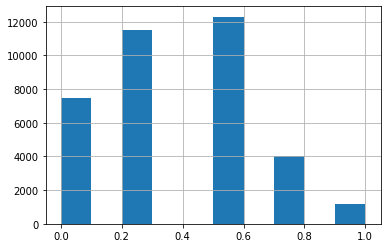

In [ ]:
train['score'].hist()

In [ ]:
display(train['context'].apply(lambda x: x[0]).value_counts())

B    8019
H    6195
G    6013
C    5288
A    4094
F    4054
E    1531
D    1279
Name: context, dtype: int64

# CV Split

In [ ]:
# # ====================================================
# # CV split
# # ====================================================
# train['score_map'] = train['score'].map({0.00: 0, 0.25: 1, 0.50: 2, 0.75: 3, 1.00: 4})
# Fold = StratifiedKFold(n_splits=CFG.n_fold, shuffle=True, random_state=CFG.seed)
# for n, (train_index, val_index) in enumerate(Fold.split(train, train['score_map'])):
#     train.loc[val_index, 'fold'] = int(n)
# train['fold'] = train['fold'].astype(int)
# display(train.groupby('fold').size())

In [ ]:
train['score_map'] = train['score'].map({0.00: 0, 0.25: 1, 0.50: 2, 0.75: 3, 1.00: 4})

encoder = LabelEncoder()
train['anchor_map'] = encoder.fit_transform(train['anchor'])

kf = StratifiedGroupKFold(n_splits=CFG.n_fold, shuffle=True, random_state=CFG.seed)
for n, (_, valid_index) in enumerate(kf.split(train, train['score_map'], groups=train['anchor_map'])):
    train.loc[valid_index, 'fold'] = int(n)

train['fold'] = train['fold'].astype(int)

In [ ]:
if CFG.debug:
    display(train.groupby('fold').size())
    train = train.sample(n=1000, random_state=0).reset_index(drop=True)
    display(train.groupby('fold').size())

# Tokenizer

In [ ]:
# ====================================================
# tokenizer
# ====================================================
tokenizer = AutoTokenizer.from_pretrained(CFG.model)
tokenizer.save_pretrained(OUTPUT_DIR+'tokenizer/')
CFG.tokenizer = tokenizer

Downloading:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

# Dataset

In [ ]:
# ====================================================
# Define max_len
# ====================================================
lengths_dict = {}

lengths = []
tk0 = tqdm(cpc_texts.values(), total=len(cpc_texts))
for text in tk0:
    length = len(tokenizer(text, add_special_tokens=False)['input_ids'])
    lengths.append(length)
lengths_dict['context_text'] = lengths

for text_col in ['anchor', 'target']:
    lengths = []
    tk0 = tqdm(train[text_col].fillna("").values, total=len(train))
    for text in tk0:
        length = len(tokenizer(text, add_special_tokens=False)['input_ids'])
        lengths.append(length)
    lengths_dict[text_col] = lengths
    
CFG.max_len = max(lengths_dict['anchor']) + max(lengths_dict['target'])\
                + max(lengths_dict['context_text']) + 4 # CLS + SEP + SEP + SEP
LOGGER.info(f"max_len: {CFG.max_len}")

In [ ]:
# ====================================================
# Dataset
# ====================================================
def prepare_input(cfg, text):
    inputs = cfg.tokenizer(text,
                           add_special_tokens=True,
                           max_length=cfg.max_len,
                           padding="max_length",
                           return_offsets_mapping=False)
    for k, v in inputs.items():
        inputs[k] = torch.tensor(v, dtype=torch.long)
    return inputs


class TrainDataset(Dataset):
    def __init__(self, cfg, df):
        self.cfg = cfg
        self.texts = df['text'].values
        self.labels = df['score'].values

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, item):
        inputs = prepare_input(self.cfg, self.texts[item])
        label = torch.tensor(self.labels[item], dtype=torch.float)
        return inputs, label

# Model

In [ ]:
class TransformerHead(nn.Module):
    def __init__(self, in_features, max_length, num_layers=1, nhead=8, num_targets=1):
        super().__init__()

        self.transformer = nn.TransformerEncoder(
            encoder_layer=nn.TransformerEncoderLayer(d_model=in_features, nhead=nhead),
            num_layers=num_layers)
        self.row_fc = nn.Linear(in_features, 1)
        self.out_features = max_length

    def forward(self, x):
        out = self.transformer(x)
        out = self.row_fc(out).squeeze(-1)
        return out

In [ ]:
# # ====================================================
# # Model
# # ====================================================
# class CustomModel(nn.Module):
#     def __init__(self, cfg, config_path=None, pretrained=False):
#         super().__init__()
#         self.cfg = cfg
#         if config_path is None:
#             self.config = AutoConfig.from_pretrained(cfg.model, output_hidden_states=True)
#         else:
#             self.config = torch.load(config_path)
#         if pretrained:
#             self.model = AutoModel.from_pretrained(cfg.model, config=self.config)
#         else:
#             self.model = AutoModel.from_config(self.config)
        
#         self.feature_extractor = AutoModelForTokenClassification.from_pretrained(cfg.model)
#         in_features = self.feature_extractor.classifier.in_features
#         self.attention = TransformerHead(in_features=in_features, max_length=133, num_layers=1, nhead=8, num_targets=1)
#         self.fc_dropout = nn.Dropout(cfg.fc_dropout)
#         self.fc = nn.Linear(self.attention.out_features, self.cfg.target_size)
#         self._init_weights(self.fc)
#         self._init_weights(self.attention)
        
#     def _init_weights(self, module):
#         if isinstance(module, nn.Linear):
#             module.weight.data.normal_(mean=0.0, std=self.config.initializer_range)
#             if module.bias is not None:
#                 module.bias.data.zero_()
#         elif isinstance(module, nn.Embedding):
#             module.weight.data.normal_(mean=0.0, std=self.config.initializer_range)
#             if module.padding_idx is not None:
#                 module.weight.data[module.padding_idx].zero_()
#         elif isinstance(module, nn.LayerNorm):
#             module.bias.data.zero_()
#             module.weight.data.fill_(1.0)
        
#     def feature(self, inputs):
#         outputs = self.model(**inputs)
#         last_hidden_states = outputs[0]
#         # feature = torch.mean(last_hidden_states, 1)
#         feature = self.attention(last_hidden_states)
        
#         return feature


#     def forward(self, inputs):
#         feature = self.feature(inputs)
#         #print(feature.shape)
#         output = self.fc(self.fc_dropout(feature))
#         return output

In [ ]:
# ====================================================
# Model
# ====================================================
class CustomModel(nn.Module):
    def __init__(self, cfg, config_path=None, pretrained=False):
        super().__init__()
        self.cfg = cfg
        if config_path is None:
            self.config = AutoConfig.from_pretrained(cfg.model, output_hidden_states=True)
        else:
            self.config = torch.load(config_path)
        if pretrained:
            self.model = AutoModel.from_pretrained(cfg.model, config=self.config)
        else:
            self.model = AutoModel.from_config(self.config)
        self.fc_dropout = nn.Dropout(cfg.fc_dropout)
        self.fc = nn.Linear(self.config.hidden_size, self.cfg.target_size)
        self._init_weights(self.fc)
        self.attention = nn.Sequential(
            nn.Linear(self.config.hidden_size, 512),
            nn.Tanh(),
            nn.Linear(512, 1),
            nn.Softmax(dim=1)
        )
        self._init_weights(self.attention)
        
    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            module.weight.data.normal_(mean=0.0, std=self.config.initializer_range)
            if module.bias is not None:
                module.bias.data.zero_()
        elif isinstance(module, nn.Embedding):
            module.weight.data.normal_(mean=0.0, std=self.config.initializer_range)
            if module.padding_idx is not None:
                module.weight.data[module.padding_idx].zero_()
        elif isinstance(module, nn.LayerNorm):
            module.bias.data.zero_()
            module.weight.data.fill_(1.0)
        
    def feature(self, inputs):
        outputs = self.model(**inputs)
        last_hidden_states = outputs[0]
        # feature = torch.mean(last_hidden_states, 1)
        weights = self.attention(last_hidden_states)
        feature = torch.sum(weights * last_hidden_states, dim=1)
        return feature

    def forward(self, inputs):
        feature = self.feature(inputs)
        output = self.fc(self.fc_dropout(feature))
        return output


In [ ]:
class FocalLossV1(nn.Module):
    def __init__(self,
                 alpha=0.1,
                 gamma=2,
                 reduction='mean',):
        super(FocalLossV1, self).__init__()
        self.alpha = alpha
        # self.alpha = torch.tensor([alpha, 1-alpha]).cuda()
        self.gamma = gamma
        self.reduction = reduction
        self.crit = nn.BCEWithLogitsLoss(reduction='none')

    def forward(self, logits, label):
        '''
        Usage is same as nn.BCEWithLogits:
            >>> criteria = FocalLossV1()
            >>> logits = torch.randn(8, 19, 384, 384)
            >>> lbs = torch.randint(0, 2, (8, 19, 384, 384)).float()
            >>> loss = criteria(logits, lbs)
        '''
        probs = torch.sigmoid(logits)
        coeff = torch.abs(label - probs).pow(self.gamma).neg()
        log_probs = torch.where(logits >= 0,
                F.softplus(logits, -1, 50),
                logits - F.softplus(logits, 1, 50))
        log_1_probs = torch.where(logits >= 0,
                -logits + F.softplus(logits, -1, 50),
                -F.softplus(logits, 1, 50))
        loss = label * self.alpha * log_probs + (1. - label) * (1. - self.alpha) * log_1_probs
        loss = loss * coeff

        if self.reduction == 'mean':
            loss = loss.mean()
        if self.reduction == 'sum':
            loss = loss.sum()
        return loss
        # BCE_loss = F.binary_cross_entropy_with_logits(logits, label, reduction='none')
        # targets = label.type(torch.long)
        # at = self.alpha.gather(0, targets.data.view(-1))
        # pt = torch.exp(-BCE_loss)
        # F_loss = at*(1-pt)**self.gamma * BCE_loss
        # return F_loss.mean()

In [ ]:
class FocalLossWithSmoothing(nn.Module):
    def __init__(
            self,
            num_classes: int,
            gamma: int = 1,
            lb_smooth: float = 0.1,
            size_average: bool = True,
            ignore_index: int = None,
            alpha: float = None):
        """
        :param gamma:
        :param lb_smooth:
        :param ignore_index:
        :param size_average:
        :param alpha:
        """
        super(FocalLossWithSmoothing, self).__init__()
        self._num_classes = num_classes
        self._gamma = gamma
        self._lb_smooth = lb_smooth
        self._size_average = size_average
        self._ignore_index = ignore_index
        self._log_softmax = nn.LogSoftmax(dim=1)
        self._alpha = alpha

        if self._num_classes <= 1:
            raise ValueError('The number of classes must be 2 or higher')
        if self._gamma < 0:
            raise ValueError('Gamma must be 0 or higher')
        if self._alpha is not None:
            if self._alpha <= 0 or self._alpha >= 1:
                raise ValueError('Alpha must be 0 <= alpha <= 1')

    def forward(self, logits, label):
        """
        :param logits: (batch_size, class, height, width)
        :param label:
        :return:
        """
        logits = logits.float()
        difficulty_level = self._estimate_difficulty_level(logits, label)

        with torch.no_grad():
            label = label.clone().detach()
            if self._ignore_index is not None:
                ignore = label.eq(self._ignore_index)
                label[ignore] = 0
            lb_pos, lb_neg = 1. - self._lb_smooth, self._lb_smooth / (self._num_classes - 1)
            lb_one_hot = torch.empty_like(logits).fill_(
                lb_neg).scatter_(1, label.unsqueeze(1), lb_pos).detach()
        logs = self._log_softmax(logits)
        loss = -torch.sum(difficulty_level * logs * lb_one_hot, dim=1)
        if self._ignore_index is not None:
            loss[ignore] = 0
        return loss.mean()

    def _estimate_difficulty_level(self, logits, label):
        """
        :param logits:
        :param label:
        :return:
        """
        one_hot_key = torch.nn.functional.one_hot(label, num_classes=self._num_classes)
        if len(one_hot_key.shape) == 4:
            one_hot_key = one_hot_key.permute(0, 3, 1, 2)
        if one_hot_key.device != logits.device:
            one_hot_key = one_hot_key.to(logits.device)
        pt = one_hot_key * F.softmax(logits)
        difficulty_level = torch.pow(1 - pt, self._gamma)
        return difficulty_level


In [ ]:
class FocalLoss(nn.Module):
    def __init__(self, reduction='none', alpha=1, gamma=2):
        super().__init__()
        self.reduction = reduction
        self.alpha = alpha
        self.gamma = gamma

    def forward(self, inputs, targets):
        bce_loss = F.binary_cross_entropy_with_logits(inputs, targets, reduction='none')
        pt = torch.exp(-bce_loss)
        loss = self.alpha * (1. - pt)**self.gamma * bce_loss
        if self.reduction == 'none':
            loss = loss
        elif self.reduction == 'sum':
            loss = loss.sum()
        elif self.reduction == 'mean':
            loss = loss.mean()
        return loss


class SmoothFocalLoss(nn.Module):
    def __init__(self, reduction='none', alpha=1, gamma=2, smoothing=0.0):
        super().__init__()
        self.reduction = reduction
        self.focal_loss = FocalLoss(reduction='none', alpha=alpha, gamma=gamma)
        self.smoothing = smoothing

    @staticmethod
    def _smooth(targets:torch.Tensor, smoothing=0.0):
        assert 0 <= smoothing < 1
        with torch.no_grad():
            targets = targets * (1.0 - smoothing) + 0.5 * smoothing
        return targets

    def forward(self, inputs, targets):
        targets = SmoothFocalLoss._smooth(targets, self.smoothing)
        loss = self.focal_loss(inputs, targets)
        if self.reduction == 'none':
            loss = loss
        elif self.reduction == 'sum':
            loss = loss.sum()
        elif self.reduction == 'mean':
            loss = loss.mean()
        return loss

In [ ]:
# def criterion_focal_loss(preds, targets):
#     targets2 = torch.where(targets >= 0.5, 2*targets -1, 1 - 2*targets)
#     preds2 = torch.where(targets >= 0.5, preds, -preds)
#     loss = - targets2 * F.logsigmoid(preds2)
#     return loss

In [ ]:
# class LabelSmoothSoftmaxCE(nn.Module):
#     '''
#     This is the autograd version, you can also try the LabelSmoothSoftmaxCEV2 that uses derived gradients
#     '''

#     def __init__(self, lb_smooth=0.1, reduction='mean', ignore_index=-100, loss_func=nn.LogSoftmax(dim=1)):
#         super(LabelSmoothSoftmaxCE, self).__init__()
#         self.lb_smooth = lb_smooth
#         self.reduction = reduction
#         self.lb_ignore = ignore_index
#         self.log_softmax = nn.LogSoftmax(dim=1)
 
#     def forward(self, logits, label):
#         '''
#         Same usage method as nn.CrossEntropyLoss:
#             >>> criteria = LabelSmoothSoftmaxCEV1()
#             >>> logits = torch.randn(8, 19, 384, 384) # nchw, float/half
#             >>> lbs = torch.randint(0, 19, (8, 384, 384)) # nhw, int64_t
#             >>> loss = criteria(logits, lbs)
#         '''
#         # overcome ignored label
#         logits = logits.float() # use fp32 to avoid nan
#         with torch.no_grad():
#             num_classes = logits.size(1)
#             label = label.clone().detach()
#             ignore = label.eq(self.lb_ignore)
#             n_valid = ignore.eq(0).sum()
#             label[ignore] = 0
#             lb_pos, lb_neg = 1. - self.lb_smooth, self.lb_smooth / num_classes
#             lb_one_hot = torch.empty_like(logits).fill_(lb_neg).scatter_(1, label.unsqueeze(1), lb_pos).detach()

#         logs = self.log_softmax(logits)
#         loss = -torch.sum(logs * lb_one_hot, dim=1)
#         loss[ignore] = 0
#         if self.reduction == 'mean':
#             loss = loss.sum() / n_valid
#         if self.reduction == 'sum':
#             loss = loss.sum()

#         return loss


# Helper Functions

In [ ]:
# ====================================================
# Helper functions
# ====================================================
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count


def asMinutes(s):
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)


def timeSince(since, percent):
    now = time.time()
    s = now - since
    es = s / (percent)
    rs = es - s
    return '%s (remain %s)' % (asMinutes(s), asMinutes(rs))


def train_fn(fold, train_loader, model, criterion, optimizer, epoch, scheduler, device):
    model.train()
    scaler = torch.cuda.amp.GradScaler(enabled=CFG.apex)
    losses = AverageMeter()
    start = end = time.time()
    global_step = 0
    for step, (inputs, labels) in enumerate(train_loader):
        for k, v in inputs.items():
            inputs[k] = v.to(device)
        labels = labels.to(device)
        batch_size = labels.size(0)
        with torch.cuda.amp.autocast(enabled=CFG.apex):
            y_preds = model(inputs)
        
        # loss = criterion(y_preds.sigmoid().view(-1, 1), labels.view(-1, 1))
        loss = criterion(y_preds.view(-1, 1), labels.view(-1, 1))
        # loss = criterion_focal_loss(y_preds.view(-1, 1), labels.view(-1, 1))

        if CFG.gradient_accumulation_steps > 1:
            loss = loss / CFG.gradient_accumulation_steps
        losses.update(loss.item(), batch_size)
        scaler.scale(loss).backward()
        grad_norm = torch.nn.utils.clip_grad_norm_(model.parameters(), CFG.max_grad_norm)
        if (step + 1) % CFG.gradient_accumulation_steps == 0:
            scaler.step(optimizer)
            scaler.update()
            optimizer.zero_grad()
            global_step += 1
            if CFG.batch_scheduler:
                scheduler.step()
        end = time.time()
        if step % CFG.print_freq == 0 or step == (len(train_loader)-1):
            print('Epoch: [{0}][{1}/{2}] '
                  'Elapsed {remain:s} '
                  'Loss: {loss.val:.4f}({loss.avg:.4f}) '
                  'Grad: {grad_norm:.4f}  '
                  'LR: {lr:.8f}  '
                  .format(epoch+1, step, len(train_loader), 
                          remain=timeSince(start, float(step+1)/len(train_loader)),
                          loss=losses,
                          grad_norm=grad_norm,
                          lr=scheduler.get_lr()[0]))
        if CFG.wandb:
            wandb.log({f"[fold{fold}] loss": losses.val,
                       f"[fold{fold}] lr": scheduler.get_lr()[0]})
    return losses.avg


def valid_fn(valid_loader, model, criterion, device):
    losses = AverageMeter()
    model.eval()
    preds = []
    start = end = time.time()
    for step, (inputs, labels) in enumerate(valid_loader):
        for k, v in inputs.items():
            inputs[k] = v.to(device)
        labels = labels.to(device)
        batch_size = labels.size(0)
        with torch.no_grad():
            y_preds = model(inputs)
        loss = criterion(y_preds.view(-1, 1), labels.view(-1, 1))
        # loss = criterion_focal_loss(y_preds.view(-1, 1), labels.view(-1, 1))

        if CFG.gradient_accumulation_steps > 1:
            loss = loss / CFG.gradient_accumulation_steps
        losses.update(loss.item(), batch_size)
        preds.append(y_preds.sigmoid().to('cpu').numpy())
        # preds.append(y_preds.to('cpu').numpy())
        end = time.time()
        if step % CFG.print_freq == 0 or step == (len(valid_loader)-1):
            print('EVAL: [{0}/{1}] '
                  'Elapsed {remain:s} '
                  'Loss: {loss.val:.4f}({loss.avg:.4f}) '
                  .format(step, len(valid_loader),
                          loss=losses,
                          remain=timeSince(start, float(step+1)/len(valid_loader))))
    predictions = np.concatenate(preds)
    predictions = np.concatenate(predictions)
    return losses.avg, predictions


def inference_fn(test_loader, model, device):
    preds = []
    model.eval()
    model.to(device)
    tk0 = tqdm(test_loader, total=len(test_loader))
    for inputs in tk0:
        for k, v in inputs.items():
            inputs[k] = v.to(device)
        with torch.no_grad():
            y_preds = model(inputs)
        preds.append(y_preds.sigmoid().to('cpu').numpy())
    predictions = np.concatenate(preds)
    return predictions

In [ ]:
# ====================================================
# train loop
# ====================================================
def train_loop(folds, fold):
    
    LOGGER.info(f"========== fold: {fold} training ==========")

    # ====================================================
    # loader
    # ====================================================
    train_folds = folds[folds['fold'] != fold].reset_index(drop=True)
    valid_folds = folds[folds['fold'] == fold].reset_index(drop=True)
    valid_labels = valid_folds['score'].values
    
    train_dataset = TrainDataset(CFG, train_folds)
    valid_dataset = TrainDataset(CFG, valid_folds)

    train_loader = DataLoader(train_dataset,
                              batch_size=CFG.batch_size,
                              shuffle=True,
                              num_workers=CFG.num_workers, pin_memory=True, drop_last=True)
    valid_loader = DataLoader(valid_dataset,
                              batch_size=CFG.batch_size,
                              shuffle=False,
                              num_workers=CFG.num_workers, pin_memory=True, drop_last=False)

    # ====================================================
    # model & optimizer
    # ====================================================
    model = CustomModel(CFG, config_path=None, pretrained=True)
    torch.save(model.config, OUTPUT_DIR+'config.pth')
    model.to(device)
    
    def get_optimizer_params(model, encoder_lr, decoder_lr, weight_decay=0.0):
        param_optimizer = list(model.named_parameters())
        no_decay = ["bias", "LayerNorm.bias", "LayerNorm.weight"]
        optimizer_parameters = [
            {'params': [p for n, p in model.model.named_parameters() if not any(nd in n for nd in no_decay)],
             'lr': encoder_lr, 'weight_decay': weight_decay},
            {'params': [p for n, p in model.model.named_parameters() if any(nd in n for nd in no_decay)],
             'lr': encoder_lr, 'weight_decay': 0.0},
            {'params': [p for n, p in model.named_parameters() if "model" not in n],
             'lr': decoder_lr, 'weight_decay': 0.0}
        ]
        return optimizer_parameters

    optimizer_parameters = get_optimizer_params(model,
                                                encoder_lr=CFG.encoder_lr, 
                                                decoder_lr=CFG.decoder_lr,
                                                weight_decay=CFG.weight_decay)
    optimizer = AdamW(optimizer_parameters, lr=CFG.encoder_lr, eps=CFG.eps, betas=CFG.betas)
    
    # ====================================================
    # scheduler
    # ====================================================
    def get_scheduler(cfg, optimizer, num_train_steps):
        if cfg.scheduler == 'linear':
            scheduler = get_linear_schedule_with_warmup(
                optimizer, num_warmup_steps=cfg.num_warmup_steps, num_training_steps=num_train_steps
            )
        elif cfg.scheduler == 'cosine':
            scheduler = get_cosine_schedule_with_warmup(
                optimizer, num_warmup_steps=cfg.num_warmup_steps, num_training_steps=num_train_steps, num_cycles=cfg.num_cycles
            )
        return scheduler
    
    num_train_steps = int(len(train_folds) / CFG.batch_size * CFG.epochs)
    scheduler = get_scheduler(CFG, optimizer, num_train_steps)

    # ====================================================
    # loop
    # ====================================================
    # criterion = nn.BCEWithLogitsLoss(reduction="mean")
    # criterion = FocalLossV1(alpha=CFG.alpha, gamma=CFG.gamma, reduction=CFG.focal_reduction).cuda()
    # criterion1 = FocalLossWithSmoothing(5, gamma=CFG.gamma, lb_smooth=CFG.lb_smooth, alpha=CFG.alpha)
    # criterion = LabelSmoothSoftmaxCE(lb_smooth=CFG.lb_smooth, loss_func=criterion1)
    criterion = SmoothFocalLoss(reduction=CFG.focal_reduction, alpha=CFG.alpha, gamma=CFG.gamma, smoothing=CFG.lb_smooth)

    best_score = 0.

    for epoch in range(CFG.epochs):

        start_time = time.time()

        # train
        avg_loss = train_fn(fold, train_loader, model, criterion, optimizer, epoch, scheduler, device)

        # eval
        avg_val_loss, predictions = valid_fn(valid_loader, model, criterion, device)
        
        # scoring
        score = get_score(valid_labels, predictions)

        elapsed = time.time() - start_time

        LOGGER.info(f'Epoch {epoch+1} - avg_train_loss: {avg_loss:.4f}  avg_val_loss: {avg_val_loss:.4f}  time: {elapsed:.0f}s')
        LOGGER.info(f'Epoch {epoch+1} - Score: {score:.4f}')
        if CFG.wandb:
            wandb.log({f"[fold{fold}] epoch": epoch+1, 
                       f"[fold{fold}] avg_train_loss": avg_loss, 
                       f"[fold{fold}] avg_val_loss": avg_val_loss,
                       f"[fold{fold}] score": score})
        
        if best_score < score:
            best_score = score
            LOGGER.info(f'Epoch {epoch+1} - Save Best Score: {best_score:.4f} Model')
            torch.save({'model': model.state_dict(),
                        'predictions': predictions},
                        OUTPUT_DIR+f"{CFG.model.replace('/', '-')}_fold{fold}_best.pth")
        
        torch.cuda.empty_cache()
        gc.collect()

    predictions = torch.load(OUTPUT_DIR+f"{CFG.model.replace('/', '-')}_fold{fold}_best.pth", 
                             map_location=torch.device('cpu'))['predictions']
    valid_folds['pred'] = predictions

    torch.cuda.empty_cache()
    gc.collect()
    
    return valid_folds

In [ ]:
if __name__ == '__main__':
    
    def get_result(oof_df):
        labels = oof_df['score'].values
        preds = oof_df['pred'].values
        score = get_score(labels, preds)
        LOGGER.info(f'Score: {score:<.4f}')
    
    if CFG.train:
        oof_df = pd.DataFrame()
        for fold in range(CFG.n_fold):
            if fold in CFG.trn_fold:
                _oof_df = train_loop(train, fold)
                oof_df = pd.concat([oof_df, _oof_df])
                LOGGER.info(f"========== fold: {fold} result ==========")
                get_result(_oof_df)
        oof_df = oof_df.reset_index(drop=True)
        LOGGER.info(f"========== CV ==========")
        get_result(oof_df)
        oof_df.to_pickle(OUTPUT_DIR+'oof_df.pkl')
        
    if CFG.wandb:
        wandb.finish()

========== fold: 0 training ==========


Downloading:   0%|          | 0.00/833M [00:00<?, ?B/s]

Some weights of the model checkpoint at microsoft/deberta-v3-large were not used when initializing DebertaV2Model: ['mask_predictions.LayerNorm.bias', 'lm_predictions.lm_head.LayerNorm.weight', 'mask_predictions.dense.bias', 'mask_predictions.dense.weight', 'mask_predictions.classifier.bias', 'mask_predictions.LayerNorm.weight', 'lm_predictions.lm_head.dense.weight', 'mask_predictions.classifier.weight', 'lm_predictions.lm_head.bias', 'lm_predictions.lm_head.dense.bias', 'lm_predictions.lm_head.LayerNorm.bias']
- This IS expected if you are initializing DebertaV2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaV2Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch: [1][0/3291] Elapsed 0m 0s (remain 47m 14s) Loss: 0.0251(0.0251) Grad: 22101.0254  LR: 0.00000040  
Epoch: [1][100/3291] Elapsed 0m 26s (remain 13m 41s) Loss: 0.0283(0.0242) Grad: 22606.3262  LR: 0.00002000  
Epoch: [1][200/3291] Elapsed 0m 51s (remain 13m 6s) Loss: 0.0231(0.0229) Grad: 20213.4941  LR: 0.00002000  
Epoch: [1][300/3291] Elapsed 1m 16s (remain 12m 35s) Loss: 0.0155(0.0222) Grad: 6187.1982  LR: 0.00001999  
Epoch: [1][400/3291] Elapsed 1m 40s (remain 12m 6s) Loss: 0.0177(0.0216) Grad: 4166.5762  LR: 0.00001998  
Epoch: [1][500/3291] Elapsed 2m 5s (remain 11m 39s) Loss: 0.0169(0.0213) Grad: 6385.3721  LR: 0.00001996  
Epoch: [1][600/3291] Elapsed 2m 30s (remain 11m 11s) Loss: 0.0144(0.0210) Grad: 6117.7583  LR: 0.00001994  
Epoch: [1][700/3291] Elapsed 2m 54s (remain 10m 45s) Loss: 0.0192(0.0208) Grad: 7379.9224  LR: 0.00001992  
Epoch: [1][800/3291] Elapsed 3m 19s (remain 10m 19s) Loss: 0.0242(0.0206) Grad: 13564.5889  LR: 0.00001990  
Epoch: [1][900/3291] Elapsed 3

Epoch 1 - avg_train_loss: 0.0192  avg_val_loss: 0.0198  time: 850s
Epoch 1 - Score: 0.8147
Epoch 1 - Save Best Score: 0.8147 Model


EVAL: [355/356] Elapsed 0m 38s (remain 0m 0s) Loss: 0.0265(0.0198) 
Epoch: [2][0/3291] Elapsed 0m 0s (remain 32m 9s) Loss: 0.0165(0.0165) Grad: 4078.5024  LR: 0.00001813  
Epoch: [2][100/3291] Elapsed 0m 26s (remain 14m 1s) Loss: 0.0138(0.0180) Grad: 4379.3188  LR: 0.00001802  
Epoch: [2][200/3291] Elapsed 0m 51s (remain 13m 13s) Loss: 0.0143(0.0180) Grad: 2913.8406  LR: 0.00001791  
Epoch: [2][300/3291] Elapsed 1m 16s (remain 12m 37s) Loss: 0.0106(0.0178) Grad: 4123.9033  LR: 0.00001779  
Epoch: [2][400/3291] Elapsed 1m 40s (remain 12m 6s) Loss: 0.0179(0.0180) Grad: 7827.3438  LR: 0.00001767  
Epoch: [2][500/3291] Elapsed 2m 5s (remain 11m 37s) Loss: 0.0200(0.0179) Grad: 4511.3730  LR: 0.00001754  
Epoch: [2][600/3291] Elapsed 2m 29s (remain 11m 10s) Loss: 0.0146(0.0179) Grad: 4304.8013  LR: 0.00001741  
Epoch: [2][700/3291] Elapsed 2m 54s (remain 10m 44s) Loss: 0.0198(0.0179) Grad: 2623.2856  LR: 0.00001728  
Epoch: [2][800/3291] Elapsed 3m 18s (remain 10m 18s) Loss: 0.0169(0.0179) G

Epoch 2 - avg_train_loss: 0.0179  avg_val_loss: 0.0197  time: 848s
Epoch 2 - Score: 0.8203
Epoch 2 - Save Best Score: 0.8203 Model


EVAL: [355/356] Elapsed 0m 37s (remain 0m 0s) Loss: 0.0247(0.0197) 
Epoch: [3][0/3291] Elapsed 0m 0s (remain 32m 22s) Loss: 0.0198(0.0198) Grad: 3803.5908  LR: 0.00001314  
Epoch: [3][100/3291] Elapsed 0m 26s (remain 13m 48s) Loss: 0.0162(0.0173) Grad: 3997.4282  LR: 0.00001296  
Epoch: [3][200/3291] Elapsed 0m 51s (remain 13m 4s) Loss: 0.0160(0.0172) Grad: 1700.9592  LR: 0.00001278  
Epoch: [3][300/3291] Elapsed 1m 15s (remain 12m 29s) Loss: 0.0145(0.0170) Grad: 3331.5979  LR: 0.00001259  
Epoch: [3][400/3291] Elapsed 1m 39s (remain 11m 58s) Loss: 0.0181(0.0170) Grad: 8667.0439  LR: 0.00001241  
Epoch: [3][500/3291] Elapsed 2m 4s (remain 11m 31s) Loss: 0.0088(0.0169) Grad: 4831.6636  LR: 0.00001222  
Epoch: [3][600/3291] Elapsed 2m 28s (remain 11m 5s) Loss: 0.0109(0.0169) Grad: 8013.0469  LR: 0.00001203  
Epoch: [3][700/3291] Elapsed 2m 53s (remain 10m 40s) Loss: 0.0175(0.0169) Grad: 2318.6128  LR: 0.00001185  
Epoch: [3][800/3291] Elapsed 3m 18s (remain 10m 16s) Loss: 0.0151(0.0171) 

Epoch 3 - avg_train_loss: 0.0171  avg_val_loss: 0.0201  time: 855s
Epoch 3 - Score: 0.8263
Epoch 3 - Save Best Score: 0.8263 Model


EVAL: [355/356] Elapsed 0m 37s (remain 0m 0s) Loss: 0.0274(0.0201) 
Epoch: [4][0/3291] Elapsed 0m 0s (remain 31m 58s) Loss: 0.0187(0.0187) Grad: 3836.1038  LR: 0.00000695  
Epoch: [4][100/3291] Elapsed 0m 26s (remain 13m 50s) Loss: 0.0140(0.0169) Grad: 2222.6440  LR: 0.00000676  
Epoch: [4][200/3291] Elapsed 0m 51s (remain 13m 14s) Loss: 0.0198(0.0168) Grad: 5518.2812  LR: 0.00000658  
Epoch: [4][300/3291] Elapsed 1m 16s (remain 12m 38s) Loss: 0.0215(0.0168) Grad: 6443.7256  LR: 0.00000640  
Epoch: [4][400/3291] Elapsed 1m 41s (remain 12m 8s) Loss: 0.0184(0.0168) Grad: 8080.0571  LR: 0.00000623  
Epoch: [4][500/3291] Elapsed 2m 5s (remain 11m 39s) Loss: 0.0216(0.0167) Grad: 7563.5776  LR: 0.00000605  
Epoch: [4][600/3291] Elapsed 2m 30s (remain 11m 13s) Loss: 0.0188(0.0167) Grad: 3400.2495  LR: 0.00000587  
Epoch: [4][700/3291] Elapsed 2m 54s (remain 10m 46s) Loss: 0.0132(0.0166) Grad: 3478.6519  LR: 0.00000570  
Epoch: [4][800/3291] Elapsed 3m 19s (remain 10m 20s) Loss: 0.0193(0.0167)

Epoch 4 - avg_train_loss: 0.0166  avg_val_loss: 0.0201  time: 852s
Epoch 4 - Score: 0.8242


EVAL: [355/356] Elapsed 0m 37s (remain 0m 0s) Loss: 0.0272(0.0201) 
Epoch: [5][0/3291] Elapsed 0m 0s (remain 32m 34s) Loss: 0.0125(0.0125) Grad: 2906.0417  LR: 0.00000192  
Epoch: [5][100/3291] Elapsed 0m 25s (remain 13m 26s) Loss: 0.0165(0.0165) Grad: 2267.2971  LR: 0.00000181  
Epoch: [5][200/3291] Elapsed 0m 50s (remain 12m 55s) Loss: 0.0150(0.0162) Grad: 1543.8174  LR: 0.00000170  
Epoch: [5][300/3291] Elapsed 1m 15s (remain 12m 28s) Loss: 0.0133(0.0165) Grad: 3680.7012  LR: 0.00000160  
Epoch: [5][400/3291] Elapsed 1m 39s (remain 12m 0s) Loss: 0.0193(0.0164) Grad: 2993.8901  LR: 0.00000149  
Epoch: [5][500/3291] Elapsed 2m 4s (remain 11m 33s) Loss: 0.0143(0.0165) Grad: 1582.6245  LR: 0.00000139  
Epoch: [5][600/3291] Elapsed 2m 29s (remain 11m 8s) Loss: 0.0154(0.0165) Grad: 3737.0513  LR: 0.00000130  
Epoch: [5][700/3291] Elapsed 2m 54s (remain 10m 43s) Loss: 0.0102(0.0164) Grad: 2982.9150  LR: 0.00000121  
Epoch: [5][800/3291] Elapsed 3m 18s (remain 10m 17s) Loss: 0.0192(0.0164) 

Epoch 5 - avg_train_loss: 0.0164  avg_val_loss: 0.0203  time: 853s
Epoch 5 - Score: 0.8227


EVAL: [355/356] Elapsed 0m 37s (remain 0m 0s) Loss: 0.0270(0.0203) 


========== fold: 0 result ==========
Score: 0.8263
========== fold: 1 training ==========
Some weights of the model checkpoint at microsoft/deberta-v3-large were not used when initializing DebertaV2Model: ['mask_predictions.LayerNorm.bias', 'lm_predictions.lm_head.LayerNorm.weight', 'mask_predictions.dense.bias', 'mask_predictions.dense.weight', 'mask_predictions.classifier.bias', 'mask_predictions.LayerNorm.weight', 'lm_predictions.lm_head.dense.weight', 'mask_predictions.classifier.weight', 'lm_predictions.lm_head.bias', 'lm_predictions.lm_head.dense.bias', 'lm_predictions.lm_head.LayerNorm.bias']
- This IS expected if you are initializing DebertaV2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaV2Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequ

Epoch: [1][0/3247] Elapsed 0m 0s (remain 28m 5s) Loss: 0.0581(0.0581) Grad: 93435.6406  LR: 0.00000040  
Epoch: [1][100/3247] Elapsed 0m 25s (remain 13m 2s) Loss: 0.0304(0.0317) Grad: 26448.5156  LR: 0.00002000  
Epoch: [1][200/3247] Elapsed 0m 49s (remain 12m 33s) Loss: 0.0206(0.0268) Grad: 7907.8369  LR: 0.00002000  
Epoch: [1][300/3247] Elapsed 1m 14s (remain 12m 7s) Loss: 0.0244(0.0248) Grad: 17253.2344  LR: 0.00001999  
Epoch: [1][400/3247] Elapsed 1m 39s (remain 11m 42s) Loss: 0.0178(0.0237) Grad: 8469.4473  LR: 0.00001998  
Epoch: [1][500/3247] Elapsed 2m 3s (remain 11m 17s) Loss: 0.0141(0.0231) Grad: 7788.2295  LR: 0.00001996  
Epoch: [1][600/3247] Elapsed 2m 28s (remain 10m 53s) Loss: 0.0184(0.0225) Grad: 6083.7754  LR: 0.00001994  
Epoch: [1][700/3247] Elapsed 2m 53s (remain 10m 28s) Loss: 0.0202(0.0222) Grad: 6475.0464  LR: 0.00001992  
Epoch: [1][800/3247] Elapsed 3m 17s (remain 10m 3s) Loss: 0.0109(0.0218) Grad: 4957.2227  LR: 0.00001989  
Epoch: [1][900/3247] Elapsed 3m 4

Epoch 1 - avg_train_loss: 0.0196  avg_val_loss: 0.0186  time: 849s
Epoch 1 - Score: 0.8202
Epoch 1 - Save Best Score: 0.8202 Model


EVAL: [399/400] Elapsed 0m 42s (remain 0m 0s) Loss: 0.0084(0.0186) 
Epoch: [2][0/3247] Elapsed 0m 0s (remain 32m 22s) Loss: 0.0166(0.0166) Grad: 10440.9414  LR: 0.00001814  
Epoch: [2][100/3247] Elapsed 0m 26s (remain 13m 39s) Loss: 0.0216(0.0177) Grad: 5432.6729  LR: 0.00001802  
Epoch: [2][200/3247] Elapsed 0m 51s (remain 13m 4s) Loss: 0.0199(0.0179) Grad: 8215.6045  LR: 0.00001790  
Epoch: [2][300/3247] Elapsed 1m 16s (remain 12m 28s) Loss: 0.0193(0.0181) Grad: 8729.0801  LR: 0.00001778  
Epoch: [2][400/3247] Elapsed 1m 41s (remain 11m 57s) Loss: 0.0169(0.0180) Grad: 6890.3789  LR: 0.00001766  
Epoch: [2][500/3247] Elapsed 2m 6s (remain 11m 30s) Loss: 0.0231(0.0180) Grad: 22334.2891  LR: 0.00001753  
Epoch: [2][600/3247] Elapsed 2m 31s (remain 11m 4s) Loss: 0.0145(0.0180) Grad: 3635.9243  LR: 0.00001740  
Epoch: [2][700/3247] Elapsed 2m 56s (remain 10m 39s) Loss: 0.0146(0.0181) Grad: 5673.4370  LR: 0.00001727  
Epoch: [2][800/3247] Elapsed 3m 20s (remain 10m 12s) Loss: 0.0188(0.0182

Epoch 2 - avg_train_loss: 0.0179  avg_val_loss: 0.0188  time: 851s
Epoch 2 - Score: 0.8286
Epoch 2 - Save Best Score: 0.8286 Model


EVAL: [399/400] Elapsed 0m 42s (remain 0m 0s) Loss: 0.0053(0.0188) 
Epoch: [3][0/3247] Elapsed 0m 3s (remain 208m 24s) Loss: 0.0220(0.0220) Grad: 5547.8784  LR: 0.00001315  
Epoch: [3][100/3247] Elapsed 0m 29s (remain 15m 19s) Loss: 0.0114(0.0169) Grad: 2018.4346  LR: 0.00001296  
Epoch: [3][200/3247] Elapsed 0m 54s (remain 13m 51s) Loss: 0.0189(0.0171) Grad: 14936.1768  LR: 0.00001278  
Epoch: [3][300/3247] Elapsed 1m 19s (remain 12m 59s) Loss: 0.0100(0.0172) Grad: 12599.3242  LR: 0.00001259  
Epoch: [3][400/3247] Elapsed 1m 44s (remain 12m 19s) Loss: 0.0180(0.0172) Grad: 3296.8718  LR: 0.00001240  
Epoch: [3][500/3247] Elapsed 2m 8s (remain 11m 46s) Loss: 0.0136(0.0172) Grad: 4726.8521  LR: 0.00001221  
Epoch: [3][600/3247] Elapsed 2m 33s (remain 11m 16s) Loss: 0.0174(0.0172) Grad: 2374.8210  LR: 0.00001202  
Epoch: [3][700/3247] Elapsed 2m 58s (remain 10m 48s) Loss: 0.0158(0.0173) Grad: 6590.3477  LR: 0.00001183  
Epoch: [3][800/3247] Elapsed 3m 23s (remain 10m 20s) Loss: 0.0193(0.0

Epoch 3 - avg_train_loss: 0.0172  avg_val_loss: 0.0190  time: 850s
Epoch 3 - Score: 0.8324
Epoch 3 - Save Best Score: 0.8324 Model


EVAL: [399/400] Elapsed 0m 42s (remain 0m 0s) Loss: 0.0059(0.0190) 
Epoch: [4][0/3247] Elapsed 0m 0s (remain 32m 48s) Loss: 0.0145(0.0145) Grad: 4581.9844  LR: 0.00000695  
Epoch: [4][100/3247] Elapsed 0m 26s (remain 13m 37s) Loss: 0.0150(0.0170) Grad: 1856.3745  LR: 0.00000677  
Epoch: [4][200/3247] Elapsed 0m 51s (remain 13m 1s) Loss: 0.0196(0.0171) Grad: 9049.6523  LR: 0.00000658  
Epoch: [4][300/3247] Elapsed 1m 16s (remain 12m 25s) Loss: 0.0184(0.0169) Grad: 5077.5337  LR: 0.00000640  
Epoch: [4][400/3247] Elapsed 1m 41s (remain 12m 0s) Loss: 0.0156(0.0169) Grad: 2034.2955  LR: 0.00000622  
Epoch: [4][500/3247] Elapsed 2m 6s (remain 11m 33s) Loss: 0.0123(0.0169) Grad: 2365.8513  LR: 0.00000604  
Epoch: [4][600/3247] Elapsed 2m 31s (remain 11m 7s) Loss: 0.0201(0.0169) Grad: 1944.8336  LR: 0.00000586  
Epoch: [4][700/3247] Elapsed 2m 56s (remain 10m 42s) Loss: 0.0158(0.0168) Grad: 995.9092  LR: 0.00000569  
Epoch: [4][800/3247] Elapsed 3m 21s (remain 10m 16s) Loss: 0.0183(0.0169) Gr

Epoch 4 - avg_train_loss: 0.0167  avg_val_loss: 0.0197  time: 853s
Epoch 4 - Score: 0.8294


EVAL: [399/400] Elapsed 0m 42s (remain 0m 0s) Loss: 0.0049(0.0197) 
Epoch: [5][0/3247] Elapsed 0m 0s (remain 33m 30s) Loss: 0.0137(0.0137) Grad: 6305.7285  LR: 0.00000192  
Epoch: [5][100/3247] Elapsed 0m 25s (remain 13m 25s) Loss: 0.0211(0.0163) Grad: 7647.9502  LR: 0.00000181  
Epoch: [5][200/3247] Elapsed 0m 51s (remain 12m 56s) Loss: 0.0135(0.0163) Grad: 5377.9604  LR: 0.00000170  
Epoch: [5][300/3247] Elapsed 1m 16s (remain 12m 29s) Loss: 0.0169(0.0165) Grad: 48741.4141  LR: 0.00000159  
Epoch: [5][400/3247] Elapsed 1m 41s (remain 12m 3s) Loss: 0.0121(0.0163) Grad: 915.2499  LR: 0.00000149  
Epoch: [5][500/3247] Elapsed 2m 7s (remain 11m 39s) Loss: 0.0181(0.0164) Grad: 5153.0063  LR: 0.00000139  
Epoch: [5][600/3247] Elapsed 2m 33s (remain 11m 13s) Loss: 0.0131(0.0165) Grad: 1825.6902  LR: 0.00000129  
Epoch: [5][700/3247] Elapsed 2m 58s (remain 10m 48s) Loss: 0.0139(0.0165) Grad: 2141.3740  LR: 0.00000120  
Epoch: [5][800/3247] Elapsed 3m 23s (remain 10m 22s) Loss: 0.0084(0.0164)

Epoch 5 - avg_train_loss: 0.0165  avg_val_loss: 0.0198  time: 865s
Epoch 5 - Score: 0.8290


EVAL: [399/400] Elapsed 0m 42s (remain 0m 0s) Loss: 0.0049(0.0198) 


========== fold: 1 result ==========
Score: 0.8324
========== fold: 2 training ==========
Some weights of the model checkpoint at microsoft/deberta-v3-large were not used when initializing DebertaV2Model: ['mask_predictions.LayerNorm.bias', 'lm_predictions.lm_head.LayerNorm.weight', 'mask_predictions.dense.bias', 'mask_predictions.dense.weight', 'mask_predictions.classifier.bias', 'mask_predictions.LayerNorm.weight', 'lm_predictions.lm_head.dense.weight', 'mask_predictions.classifier.weight', 'lm_predictions.lm_head.bias', 'lm_predictions.lm_head.dense.bias', 'lm_predictions.lm_head.LayerNorm.bias']
- This IS expected if you are initializing DebertaV2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaV2Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequ

Epoch: [1][0/3297] Elapsed 0m 0s (remain 29m 26s) Loss: 0.0217(0.0217) Grad: 10119.4570  LR: 0.00000040  
Epoch: [1][100/3297] Elapsed 0m 25s (remain 13m 20s) Loss: 0.0289(0.0247) Grad: 21188.8027  LR: 0.00002000  
Epoch: [1][200/3297] Elapsed 0m 49s (remain 12m 49s) Loss: 0.0159(0.0231) Grad: 11408.0850  LR: 0.00002000  
Epoch: [1][300/3297] Elapsed 1m 14s (remain 12m 23s) Loss: 0.0268(0.0222) Grad: 17662.6445  LR: 0.00001999  
Epoch: [1][400/3297] Elapsed 1m 39s (remain 12m 1s) Loss: 0.0229(0.0218) Grad: 13322.3154  LR: 0.00001998  
Epoch: [1][500/3297] Elapsed 2m 5s (remain 11m 39s) Loss: 0.0139(0.0214) Grad: 6233.1157  LR: 0.00001996  
Epoch: [1][600/3297] Elapsed 2m 30s (remain 11m 15s) Loss: 0.0138(0.0211) Grad: 5269.3901  LR: 0.00001994  
Epoch: [1][700/3297] Elapsed 2m 55s (remain 10m 51s) Loss: 0.0178(0.0209) Grad: 215174.9844  LR: 0.00001992  
Epoch: [1][800/3297] Elapsed 3m 20s (remain 10m 26s) Loss: 0.0201(0.0207) Grad: 34123.9336  LR: 0.00001990  
Epoch: [1][900/3297] Elap

Epoch 1 - avg_train_loss: 0.0192  avg_val_loss: 0.0187  time: 874s
Epoch 1 - Score: 0.8348
Epoch 1 - Save Best Score: 0.8348 Model


EVAL: [350/351] Elapsed 0m 37s (remain 0m 0s) Loss: 0.0178(0.0187) 
Epoch: [2][0/3297] Elapsed 0m 0s (remain 33m 39s) Loss: 0.0127(0.0127) Grad: 2243.3818  LR: 0.00001813  
Epoch: [2][100/3297] Elapsed 0m 27s (remain 14m 17s) Loss: 0.0207(0.0178) Grad: 4891.6128  LR: 0.00001802  
Epoch: [2][200/3297] Elapsed 0m 52s (remain 13m 34s) Loss: 0.0228(0.0178) Grad: 5151.5244  LR: 0.00001791  
Epoch: [2][300/3297] Elapsed 1m 17s (remain 12m 55s) Loss: 0.0172(0.0178) Grad: 3747.3657  LR: 0.00001779  
Epoch: [2][400/3297] Elapsed 1m 42s (remain 12m 23s) Loss: 0.0182(0.0178) Grad: 5855.0737  LR: 0.00001767  
Epoch: [2][500/3297] Elapsed 2m 7s (remain 11m 53s) Loss: 0.0157(0.0178) Grad: 5407.8267  LR: 0.00001754  
Epoch: [2][600/3297] Elapsed 2m 32s (remain 11m 25s) Loss: 0.0204(0.0179) Grad: 6547.6914  LR: 0.00001741  
Epoch: [2][700/3297] Elapsed 2m 57s (remain 10m 58s) Loss: 0.0218(0.0180) Grad: 11386.0381  LR: 0.00001729  
Epoch: [2][800/3297] Elapsed 3m 22s (remain 10m 32s) Loss: 0.0198(0.017

Epoch 2 - avg_train_loss: 0.0178  avg_val_loss: 0.0200  time: 869s
Epoch 2 - Score: 0.8308


EVAL: [350/351] Elapsed 0m 37s (remain 0m 0s) Loss: 0.0178(0.0200) 
Epoch: [3][0/3297] Elapsed 0m 0s (remain 32m 13s) Loss: 0.0158(0.0158) Grad: 5569.7017  LR: 0.00001314  
Epoch: [3][100/3297] Elapsed 0m 25s (remain 13m 36s) Loss: 0.0171(0.0173) Grad: 4505.2383  LR: 0.00001296  
Epoch: [3][200/3297] Elapsed 0m 51s (remain 13m 5s) Loss: 0.0151(0.0172) Grad: 6406.5010  LR: 0.00001278  
Epoch: [3][300/3297] Elapsed 1m 16s (remain 12m 36s) Loss: 0.0166(0.0173) Grad: 1680.8833  LR: 0.00001259  
Epoch: [3][400/3297] Elapsed 1m 41s (remain 12m 10s) Loss: 0.0191(0.0172) Grad: 2486.8835  LR: 0.00001241  
Epoch: [3][500/3297] Elapsed 2m 6s (remain 11m 45s) Loss: 0.0165(0.0173) Grad: 3565.3318  LR: 0.00001222  
Epoch: [3][600/3297] Elapsed 2m 31s (remain 11m 20s) Loss: 0.0160(0.0172) Grad: 2884.7917  LR: 0.00001204  
Epoch: [3][700/3297] Elapsed 2m 57s (remain 10m 56s) Loss: 0.0152(0.0172) Grad: 3509.2593  LR: 0.00001185  
Epoch: [3][800/3297] Elapsed 3m 22s (remain 10m 31s) Loss: 0.0180(0.0172)

Epoch 3 - avg_train_loss: 0.0171  avg_val_loss: 0.0196  time: 872s
Epoch 3 - Score: 0.8362
Epoch 3 - Save Best Score: 0.8362 Model


EVAL: [350/351] Elapsed 0m 37s (remain 0m 0s) Loss: 0.0207(0.0196) 
Epoch: [4][0/3297] Elapsed 0m 0s (remain 33m 26s) Loss: 0.0159(0.0159) Grad: 3733.7202  LR: 0.00000695  
Epoch: [4][100/3297] Elapsed 0m 26s (remain 13m 55s) Loss: 0.0153(0.0165) Grad: 5579.2495  LR: 0.00000676  
Epoch: [4][200/3297] Elapsed 0m 51s (remain 13m 19s) Loss: 0.0120(0.0168) Grad: 3504.8904  LR: 0.00000658  
Epoch: [4][300/3297] Elapsed 1m 16s (remain 12m 45s) Loss: 0.0184(0.0169) Grad: 2518.1907  LR: 0.00000640  
Epoch: [4][400/3297] Elapsed 1m 41s (remain 12m 16s) Loss: 0.0194(0.0168) Grad: 4354.9521  LR: 0.00000623  
Epoch: [4][500/3297] Elapsed 2m 6s (remain 11m 47s) Loss: 0.0184(0.0167) Grad: 1452.5770  LR: 0.00000605  
Epoch: [4][600/3297] Elapsed 2m 31s (remain 11m 20s) Loss: 0.0066(0.0166) Grad: 936.6990  LR: 0.00000588  
Epoch: [4][700/3297] Elapsed 2m 56s (remain 10m 54s) Loss: 0.0163(0.0166) Grad: 3941.7852  LR: 0.00000570  
Epoch: [4][800/3297] Elapsed 3m 21s (remain 10m 28s) Loss: 0.0163(0.0165)

Epoch 4 - avg_train_loss: 0.0166  avg_val_loss: 0.0204  time: 862s
Epoch 4 - Score: 0.8301


EVAL: [350/351] Elapsed 0m 37s (remain 0m 0s) Loss: 0.0204(0.0204) 
Epoch: [5][0/3297] Elapsed 0m 0s (remain 32m 13s) Loss: 0.0160(0.0160) Grad: 3391.3481  LR: 0.00000192  
Epoch: [5][100/3297] Elapsed 0m 25s (remain 13m 28s) Loss: 0.0196(0.0158) Grad: 4252.4727  LR: 0.00000181  
Epoch: [5][200/3297] Elapsed 0m 50s (remain 12m 58s) Loss: 0.0183(0.0158) Grad: 1244.6874  LR: 0.00000170  
Epoch: [5][300/3297] Elapsed 1m 15s (remain 12m 34s) Loss: 0.0196(0.0160) Grad: 2123.1409  LR: 0.00000160  
Epoch: [5][400/3297] Elapsed 1m 40s (remain 12m 8s) Loss: 0.0171(0.0161) Grad: 1049.1761  LR: 0.00000149  
Epoch: [5][500/3297] Elapsed 2m 5s (remain 11m 43s) Loss: 0.0173(0.0161) Grad: 5590.5059  LR: 0.00000140  
Epoch: [5][600/3297] Elapsed 2m 31s (remain 11m 18s) Loss: 0.0163(0.0162) Grad: 8848.8838  LR: 0.00000130  
Epoch: [5][700/3297] Elapsed 2m 56s (remain 10m 52s) Loss: 0.0194(0.0163) Grad: 1055.7623  LR: 0.00000121  
Epoch: [5][800/3297] Elapsed 3m 21s (remain 10m 26s) Loss: 0.0196(0.0164)

Epoch 5 - avg_train_loss: 0.0164  avg_val_loss: 0.0203  time: 861s
Epoch 5 - Score: 0.8307


EVAL: [350/351] Elapsed 0m 37s (remain 0m 0s) Loss: 0.0204(0.0203) 


========== fold: 2 result ==========
Score: 0.8362
========== fold: 3 training ==========
Some weights of the model checkpoint at microsoft/deberta-v3-large were not used when initializing DebertaV2Model: ['mask_predictions.LayerNorm.bias', 'lm_predictions.lm_head.LayerNorm.weight', 'mask_predictions.dense.bias', 'mask_predictions.dense.weight', 'mask_predictions.classifier.bias', 'mask_predictions.LayerNorm.weight', 'lm_predictions.lm_head.dense.weight', 'mask_predictions.classifier.weight', 'lm_predictions.lm_head.bias', 'lm_predictions.lm_head.dense.bias', 'lm_predictions.lm_head.LayerNorm.bias']
- This IS expected if you are initializing DebertaV2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaV2Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequ

Epoch: [1][0/3278] Elapsed 0m 0s (remain 28m 38s) Loss: 0.0604(0.0604) Grad: 125819.2031  LR: 0.00000040  
Epoch: [1][100/3278] Elapsed 0m 25s (remain 13m 18s) Loss: 0.0223(0.0302) Grad: 22921.8047  LR: 0.00002000  
Epoch: [1][200/3278] Elapsed 0m 50s (remain 12m 49s) Loss: 0.0230(0.0257) Grad: 21572.8984  LR: 0.00002000  
Epoch: [1][300/3278] Elapsed 1m 15s (remain 12m 22s) Loss: 0.0241(0.0242) Grad: 14496.3994  LR: 0.00001999  
Epoch: [1][400/3278] Elapsed 1m 39s (remain 11m 56s) Loss: 0.0206(0.0231) Grad: 16179.8945  LR: 0.00001998  
Epoch: [1][500/3278] Elapsed 2m 4s (remain 11m 31s) Loss: 0.0178(0.0226) Grad: 5428.9722  LR: 0.00001996  
Epoch: [1][600/3278] Elapsed 2m 29s (remain 11m 6s) Loss: 0.0197(0.0221) Grad: 9325.6025  LR: 0.00001994  
Epoch: [1][700/3278] Elapsed 2m 54s (remain 10m 40s) Loss: 0.0216(0.0218) Grad: 8593.9883  LR: 0.00001992  
Epoch: [1][800/3278] Elapsed 3m 18s (remain 10m 15s) Loss: 0.0166(0.0215) Grad: 8543.9551  LR: 0.00001990  
Epoch: [1][900/3278] Elapse

Epoch 1 - avg_train_loss: 0.0195  avg_val_loss: 0.0192  time: 851s
Epoch 1 - Score: 0.8151
Epoch 1 - Save Best Score: 0.8151 Model


EVAL: [369/370] Elapsed 0m 39s (remain 0m 0s) Loss: 0.0262(0.0192) 
Epoch: [2][0/3278] Elapsed 0m 0s (remain 33m 13s) Loss: 0.0200(0.0200) Grad: 7176.5171  LR: 0.00001813  
Epoch: [2][100/3278] Elapsed 0m 26s (remain 13m 44s) Loss: 0.0206(0.0176) Grad: 6961.8208  LR: 0.00001802  
Epoch: [2][200/3278] Elapsed 0m 51s (remain 13m 5s) Loss: 0.0169(0.0179) Grad: 18121.8379  LR: 0.00001790  
Epoch: [2][300/3278] Elapsed 1m 15s (remain 12m 30s) Loss: 0.0161(0.0180) Grad: 20387.3164  LR: 0.00001779  
Epoch: [2][400/3278] Elapsed 1m 40s (remain 12m 2s) Loss: 0.0181(0.0181) Grad: 7411.7676  LR: 0.00001766  
Epoch: [2][500/3278] Elapsed 2m 5s (remain 11m 35s) Loss: 0.0168(0.0180) Grad: 4962.9868  LR: 0.00001754  
Epoch: [2][600/3278] Elapsed 2m 30s (remain 11m 9s) Loss: 0.0140(0.0179) Grad: 3159.4880  LR: 0.00001741  
Epoch: [2][700/3278] Elapsed 2m 55s (remain 10m 43s) Loss: 0.0151(0.0179) Grad: 6372.5962  LR: 0.00001728  
Epoch: [2][800/3278] Elapsed 3m 20s (remain 10m 18s) Loss: 0.0171(0.0180)

Epoch 2 - avg_train_loss: 0.0179  avg_val_loss: 0.0189  time: 857s
Epoch 2 - Score: 0.8187
Epoch 2 - Save Best Score: 0.8187 Model


EVAL: [369/370] Elapsed 0m 39s (remain 0m 0s) Loss: 0.0271(0.0189) 
Epoch: [3][0/3278] Elapsed 0m 0s (remain 32m 52s) Loss: 0.0153(0.0153) Grad: 3386.6621  LR: 0.00001314  
Epoch: [3][100/3278] Elapsed 0m 26s (remain 14m 3s) Loss: 0.0204(0.0170) Grad: 8218.7441  LR: 0.00001296  
Epoch: [3][200/3278] Elapsed 0m 52s (remain 13m 18s) Loss: 0.0209(0.0169) Grad: 10003.3242  LR: 0.00001278  
Epoch: [3][300/3278] Elapsed 1m 16s (remain 12m 41s) Loss: 0.0146(0.0168) Grad: 26907.9316  LR: 0.00001259  
Epoch: [3][400/3278] Elapsed 1m 41s (remain 12m 9s) Loss: 0.0169(0.0168) Grad: 1784.8500  LR: 0.00001241  
Epoch: [3][500/3278] Elapsed 2m 6s (remain 11m 41s) Loss: 0.0161(0.0169) Grad: 4310.8706  LR: 0.00001222  
Epoch: [3][600/3278] Elapsed 2m 31s (remain 11m 14s) Loss: 0.0186(0.0169) Grad: 1291.6018  LR: 0.00001203  
Epoch: [3][700/3278] Elapsed 2m 56s (remain 10m 47s) Loss: 0.0151(0.0169) Grad: 7659.2539  LR: 0.00001184  
Epoch: [3][800/3278] Elapsed 3m 21s (remain 10m 21s) Loss: 0.0201(0.0170

Epoch 3 - avg_train_loss: 0.0171  avg_val_loss: 0.0200  time: 859s
Epoch 3 - Score: 0.8174


EVAL: [369/370] Elapsed 0m 39s (remain 0m 0s) Loss: 0.0263(0.0200) 
Epoch: [4][0/3278] Elapsed 0m 0s (remain 31m 47s) Loss: 0.0163(0.0163) Grad: 3559.0730  LR: 0.00000695  
Epoch: [4][100/3278] Elapsed 0m 25s (remain 13m 21s) Loss: 0.0158(0.0166) Grad: 2268.7795  LR: 0.00000676  
Epoch: [4][200/3278] Elapsed 0m 50s (remain 12m 51s) Loss: 0.0219(0.0167) Grad: 12625.1611  LR: 0.00000658  
Epoch: [4][300/3278] Elapsed 1m 15s (remain 12m 23s) Loss: 0.0170(0.0167) Grad: 1673.4009  LR: 0.00000640  
Epoch: [4][400/3278] Elapsed 1m 39s (remain 11m 57s) Loss: 0.0159(0.0167) Grad: 4865.4819  LR: 0.00000622  
Epoch: [4][500/3278] Elapsed 2m 4s (remain 11m 32s) Loss: 0.0165(0.0167) Grad: 2853.6543  LR: 0.00000605  
Epoch: [4][600/3278] Elapsed 2m 29s (remain 11m 6s) Loss: 0.0157(0.0167) Grad: 3036.8479  LR: 0.00000587  
Epoch: [4][700/3278] Elapsed 2m 54s (remain 10m 41s) Loss: 0.0215(0.0167) Grad: 4021.5952  LR: 0.00000570  
Epoch: [4][800/3278] Elapsed 3m 19s (remain 10m 17s) Loss: 0.0196(0.0167

Epoch 4 - avg_train_loss: 0.0167  avg_val_loss: 0.0201  time: 860s
Epoch 4 - Score: 0.8176


EVAL: [369/370] Elapsed 0m 39s (remain 0m 0s) Loss: 0.0260(0.0201) 
Epoch: [5][0/3278] Elapsed 0m 0s (remain 31m 36s) Loss: 0.0141(0.0141) Grad: 1487.3282  LR: 0.00000192  
Epoch: [5][100/3278] Elapsed 0m 25s (remain 13m 23s) Loss: 0.0184(0.0168) Grad: 2990.0039  LR: 0.00000181  
Epoch: [5][200/3278] Elapsed 0m 50s (remain 12m 49s) Loss: 0.0153(0.0167) Grad: 1979.4355  LR: 0.00000170  
Epoch: [5][300/3278] Elapsed 1m 15s (remain 12m 22s) Loss: 0.0145(0.0165) Grad: 2146.7129  LR: 0.00000159  
Epoch: [5][400/3278] Elapsed 1m 39s (remain 11m 56s) Loss: 0.0171(0.0165) Grad: 2857.3462  LR: 0.00000149  
Epoch: [5][500/3278] Elapsed 2m 4s (remain 11m 31s) Loss: 0.0159(0.0165) Grad: 2911.5505  LR: 0.00000139  
Epoch: [5][600/3278] Elapsed 2m 29s (remain 11m 6s) Loss: 0.0175(0.0165) Grad: 4582.5576  LR: 0.00000130  
Epoch: [5][700/3278] Elapsed 2m 54s (remain 10m 41s) Loss: 0.0176(0.0165) Grad: 3379.5081  LR: 0.00000120  
Epoch: [5][800/3278] Elapsed 3m 19s (remain 10m 16s) Loss: 0.0184(0.0164)

Epoch 5 - avg_train_loss: 0.0164  avg_val_loss: 0.0207  time: 854s
Epoch 5 - Score: 0.8156


EVAL: [369/370] Elapsed 0m 39s (remain 0m 0s) Loss: 0.0261(0.0207) 


========== fold: 3 result ==========
Score: 0.8187
========== fold: 4 training ==========
Some weights of the model checkpoint at microsoft/deberta-v3-large were not used when initializing DebertaV2Model: ['mask_predictions.LayerNorm.bias', 'lm_predictions.lm_head.LayerNorm.weight', 'mask_predictions.dense.bias', 'mask_predictions.dense.weight', 'mask_predictions.classifier.bias', 'mask_predictions.LayerNorm.weight', 'lm_predictions.lm_head.dense.weight', 'mask_predictions.classifier.weight', 'lm_predictions.lm_head.bias', 'lm_predictions.lm_head.dense.bias', 'lm_predictions.lm_head.LayerNorm.bias']
- This IS expected if you are initializing DebertaV2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaV2Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequ

Epoch: [1][0/3268] Elapsed 0m 0s (remain 29m 45s) Loss: 0.0236(0.0236) Grad: 8014.5410  LR: 0.00000040  
Epoch: [1][100/3268] Elapsed 0m 26s (remain 13m 41s) Loss: 0.0244(0.0248) Grad: 12622.5527  LR: 0.00002000  
Epoch: [1][200/3268] Elapsed 0m 51s (remain 13m 5s) Loss: 0.0186(0.0233) Grad: 10227.2412  LR: 0.00002000  
Epoch: [1][300/3268] Elapsed 1m 16s (remain 12m 35s) Loss: 0.0216(0.0227) Grad: 14990.6318  LR: 0.00001999  
Epoch: [1][400/3268] Elapsed 1m 41s (remain 12m 9s) Loss: 0.0226(0.0222) Grad: 15362.9541  LR: 0.00001998  
Epoch: [1][500/3268] Elapsed 2m 7s (remain 11m 44s) Loss: 0.0237(0.0217) Grad: 21556.3965  LR: 0.00001996  
Epoch: [1][600/3268] Elapsed 2m 32s (remain 11m 17s) Loss: 0.0227(0.0214) Grad: 10497.5117  LR: 0.00001994  
Epoch: [1][700/3268] Elapsed 2m 58s (remain 10m 52s) Loss: 0.0178(0.0210) Grad: 13688.1357  LR: 0.00001992  
Epoch: [1][800/3268] Elapsed 3m 23s (remain 10m 27s) Loss: 0.0157(0.0208) Grad: 12080.8447  LR: 0.00001990  
Epoch: [1][900/3268] Elaps

Epoch 1 - avg_train_loss: 0.0192  avg_val_loss: 0.0191  time: 849s
Epoch 1 - Score: 0.8227
Epoch 1 - Save Best Score: 0.8227 Model


EVAL: [378/379] Elapsed 0m 40s (remain 0m 0s) Loss: 0.0356(0.0191) 
Epoch: [2][0/3268] Elapsed 0m 0s (remain 41m 32s) Loss: 0.0187(0.0187) Grad: 8812.9355  LR: 0.00001813  
Epoch: [2][100/3268] Elapsed 0m 26s (remain 13m 49s) Loss: 0.0155(0.0182) Grad: 3876.1360  LR: 0.00001802  
Epoch: [2][200/3268] Elapsed 0m 51s (remain 13m 3s) Loss: 0.0148(0.0182) Grad: 4617.2363  LR: 0.00001790  
Epoch: [2][300/3268] Elapsed 1m 15s (remain 12m 22s) Loss: 0.0204(0.0181) Grad: 12728.3672  LR: 0.00001778  
Epoch: [2][400/3268] Elapsed 1m 39s (remain 11m 50s) Loss: 0.0216(0.0181) Grad: 5143.4819  LR: 0.00001766  
Epoch: [2][500/3268] Elapsed 2m 3s (remain 11m 22s) Loss: 0.0237(0.0181) Grad: 14374.2246  LR: 0.00001754  
Epoch: [2][600/3268] Elapsed 2m 27s (remain 10m 55s) Loss: 0.0133(0.0180) Grad: 3937.3889  LR: 0.00001741  
Epoch: [2][700/3268] Elapsed 2m 51s (remain 10m 28s) Loss: 0.0233(0.0180) Grad: 4379.1357  LR: 0.00001728  
Epoch: [2][800/3268] Elapsed 3m 16s (remain 10m 4s) Loss: 0.0190(0.0180

Epoch 2 - avg_train_loss: 0.0178  avg_val_loss: 0.0201  time: 843s
Epoch 2 - Score: 0.8253
Epoch 2 - Save Best Score: 0.8253 Model


EVAL: [378/379] Elapsed 0m 40s (remain 0m 0s) Loss: 0.0405(0.0201) 
Epoch: [3][0/3268] Elapsed 0m 0s (remain 31m 59s) Loss: 0.0192(0.0192) Grad: 2537.7939  LR: 0.00001315  
Epoch: [3][100/3268] Elapsed 0m 26s (remain 13m 40s) Loss: 0.0153(0.0171) Grad: 3985.1084  LR: 0.00001296  
Epoch: [3][200/3268] Elapsed 0m 51s (remain 13m 3s) Loss: 0.0177(0.0173) Grad: 4396.3608  LR: 0.00001278  
Epoch: [3][300/3268] Elapsed 1m 16s (remain 12m 30s) Loss: 0.0145(0.0172) Grad: 4746.3428  LR: 0.00001259  
Epoch: [3][400/3268] Elapsed 1m 40s (remain 12m 1s) Loss: 0.0167(0.0171) Grad: 4748.4307  LR: 0.00001240  
Epoch: [3][500/3268] Elapsed 2m 5s (remain 11m 32s) Loss: 0.0219(0.0172) Grad: 7187.2119  LR: 0.00001222  
Epoch: [3][600/3268] Elapsed 2m 29s (remain 11m 5s) Loss: 0.0169(0.0173) Grad: 2247.3699  LR: 0.00001203  
Epoch: [3][700/3268] Elapsed 2m 54s (remain 10m 39s) Loss: 0.0193(0.0172) Grad: 10063.5068  LR: 0.00001184  
Epoch: [3][800/3268] Elapsed 3m 19s (remain 10m 13s) Loss: 0.0205(0.0173) 

Epoch 3 - avg_train_loss: 0.0170  avg_val_loss: 0.0203  time: 837s
Epoch 3 - Score: 0.8273
Epoch 3 - Save Best Score: 0.8273 Model


EVAL: [378/379] Elapsed 0m 39s (remain 0m 0s) Loss: 0.0424(0.0203) 
Epoch: [4][0/3268] Elapsed 0m 0s (remain 32m 11s) Loss: 0.0162(0.0162) Grad: 1468.2745  LR: 0.00000695  
Epoch: [4][100/3268] Elapsed 0m 25s (remain 13m 8s) Loss: 0.0250(0.0168) Grad: 5214.3228  LR: 0.00000676  
Epoch: [4][200/3268] Elapsed 0m 49s (remain 12m 39s) Loss: 0.0186(0.0167) Grad: 2392.3616  LR: 0.00000658  
Epoch: [4][300/3268] Elapsed 1m 13s (remain 12m 6s) Loss: 0.0126(0.0166) Grad: 3514.0481  LR: 0.00000640  
Epoch: [4][400/3268] Elapsed 1m 37s (remain 11m 37s) Loss: 0.0159(0.0165) Grad: 4968.2681  LR: 0.00000622  
Epoch: [4][500/3268] Elapsed 2m 2s (remain 11m 15s) Loss: 0.0172(0.0166) Grad: 2546.2056  LR: 0.00000605  
Epoch: [4][600/3268] Elapsed 2m 26s (remain 10m 51s) Loss: 0.0199(0.0165) Grad: 3249.6807  LR: 0.00000587  
Epoch: [4][700/3268] Elapsed 2m 51s (remain 10m 26s) Loss: 0.0203(0.0165) Grad: 4491.2402  LR: 0.00000569  
Epoch: [4][800/3268] Elapsed 3m 16s (remain 10m 3s) Loss: 0.0154(0.0165) G

Epoch 4 - avg_train_loss: 0.0166  avg_val_loss: 0.0203  time: 847s
Epoch 4 - Score: 0.8244


EVAL: [378/379] Elapsed 0m 40s (remain 0m 0s) Loss: 0.0473(0.0203) 
Epoch: [5][0/3268] Elapsed 0m 0s (remain 32m 2s) Loss: 0.0136(0.0136) Grad: 2334.4336  LR: 0.00000192  
Epoch: [5][100/3268] Elapsed 0m 25s (remain 13m 8s) Loss: 0.0170(0.0167) Grad: 1600.6018  LR: 0.00000181  
Epoch: [5][200/3268] Elapsed 0m 49s (remain 12m 38s) Loss: 0.0183(0.0160) Grad: 1159.0171  LR: 0.00000170  
Epoch: [5][300/3268] Elapsed 1m 14s (remain 12m 16s) Loss: 0.0186(0.0161) Grad: 5539.7583  LR: 0.00000160  
Epoch: [5][400/3268] Elapsed 1m 40s (remain 11m 55s) Loss: 0.0187(0.0162) Grad: 8967.8760  LR: 0.00000149  
Epoch: [5][500/3268] Elapsed 2m 4s (remain 11m 29s) Loss: 0.0157(0.0164) Grad: 1301.4779  LR: 0.00000139  
Epoch: [5][600/3268] Elapsed 2m 29s (remain 11m 3s) Loss: 0.0238(0.0164) Grad: 3652.0967  LR: 0.00000130  
Epoch: [5][700/3268] Elapsed 2m 54s (remain 10m 37s) Loss: 0.0160(0.0163) Grad: 2278.4287  LR: 0.00000120  
Epoch: [5][800/3268] Elapsed 3m 19s (remain 10m 13s) Loss: 0.0185(0.0163) G

Epoch 5 - avg_train_loss: 0.0164  avg_val_loss: 0.0206  time: 845s
Epoch 5 - Score: 0.8243


EVAL: [378/379] Elapsed 0m 40s (remain 0m 0s) Loss: 0.0505(0.0206) 


========== fold: 4 result ==========
Score: 0.8273
========== CV ==========
Score: 0.8260


[fold0] avg_train_loss,█▅▃▂▁
[fold0] avg_val_loss,▂▁▅▅█
[fold0] epoch,▁▃▅▆█
[fold0] loss,▆▄▅▅▂▃▆▇▅▅▆▅▃▇▃▆▇▇█▃▅▂█▄▅▃▃▆▅▄▅▄▄▁▆▇▄▁▅▃
[fold0] lr,███████▇▇▇▇▇▆▆▆▆▆▅▅▅▄▄▄▄▃▃▃▃▂▂▂▂▂▁▁▁▁▁▁▁
[fold0] score,▁▄█▇▆
[fold1] avg_train_loss,█▄▃▂▁
[fold1] avg_val_loss,▁▂▄▇█
[fold1] epoch,▁▃▅▆█
[fold1] loss,▅█▃▄▄▄▃▄▆▃▄▅▅▄▄▇▃▄▆▂▄▅▄▅▅▁▅▄▄▄▅▄▄▂▄▁▄▅▂▃
[fold1] lr,███████▇▇▇▇▇▇▆▆▆▅▅▅▅▄▄▄▄▃▃▃▃▂▂▂▂▂▁▁▁▁▁▁▁
